# Multi Linear Regression Assignment

### Data Set : ToyotaCorolla.csv

# 1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
data = pd.read_csv('ToyotaCorolla.csv',encoding = 'latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# 3. Data Understanding

## a) Initial Analysis:

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data.shape

(1436, 38)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

## b) Filtering Data:

In [9]:
details = pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis = 1)
details

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
rename_data = details.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis = 1)
rename_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
rename_data[rename_data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
imp_data = rename_data.drop_duplicates().reset_index(drop = True)
imp_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [13]:
imp_data.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## c) Correlation Matrix:

In [14]:
imp_data.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


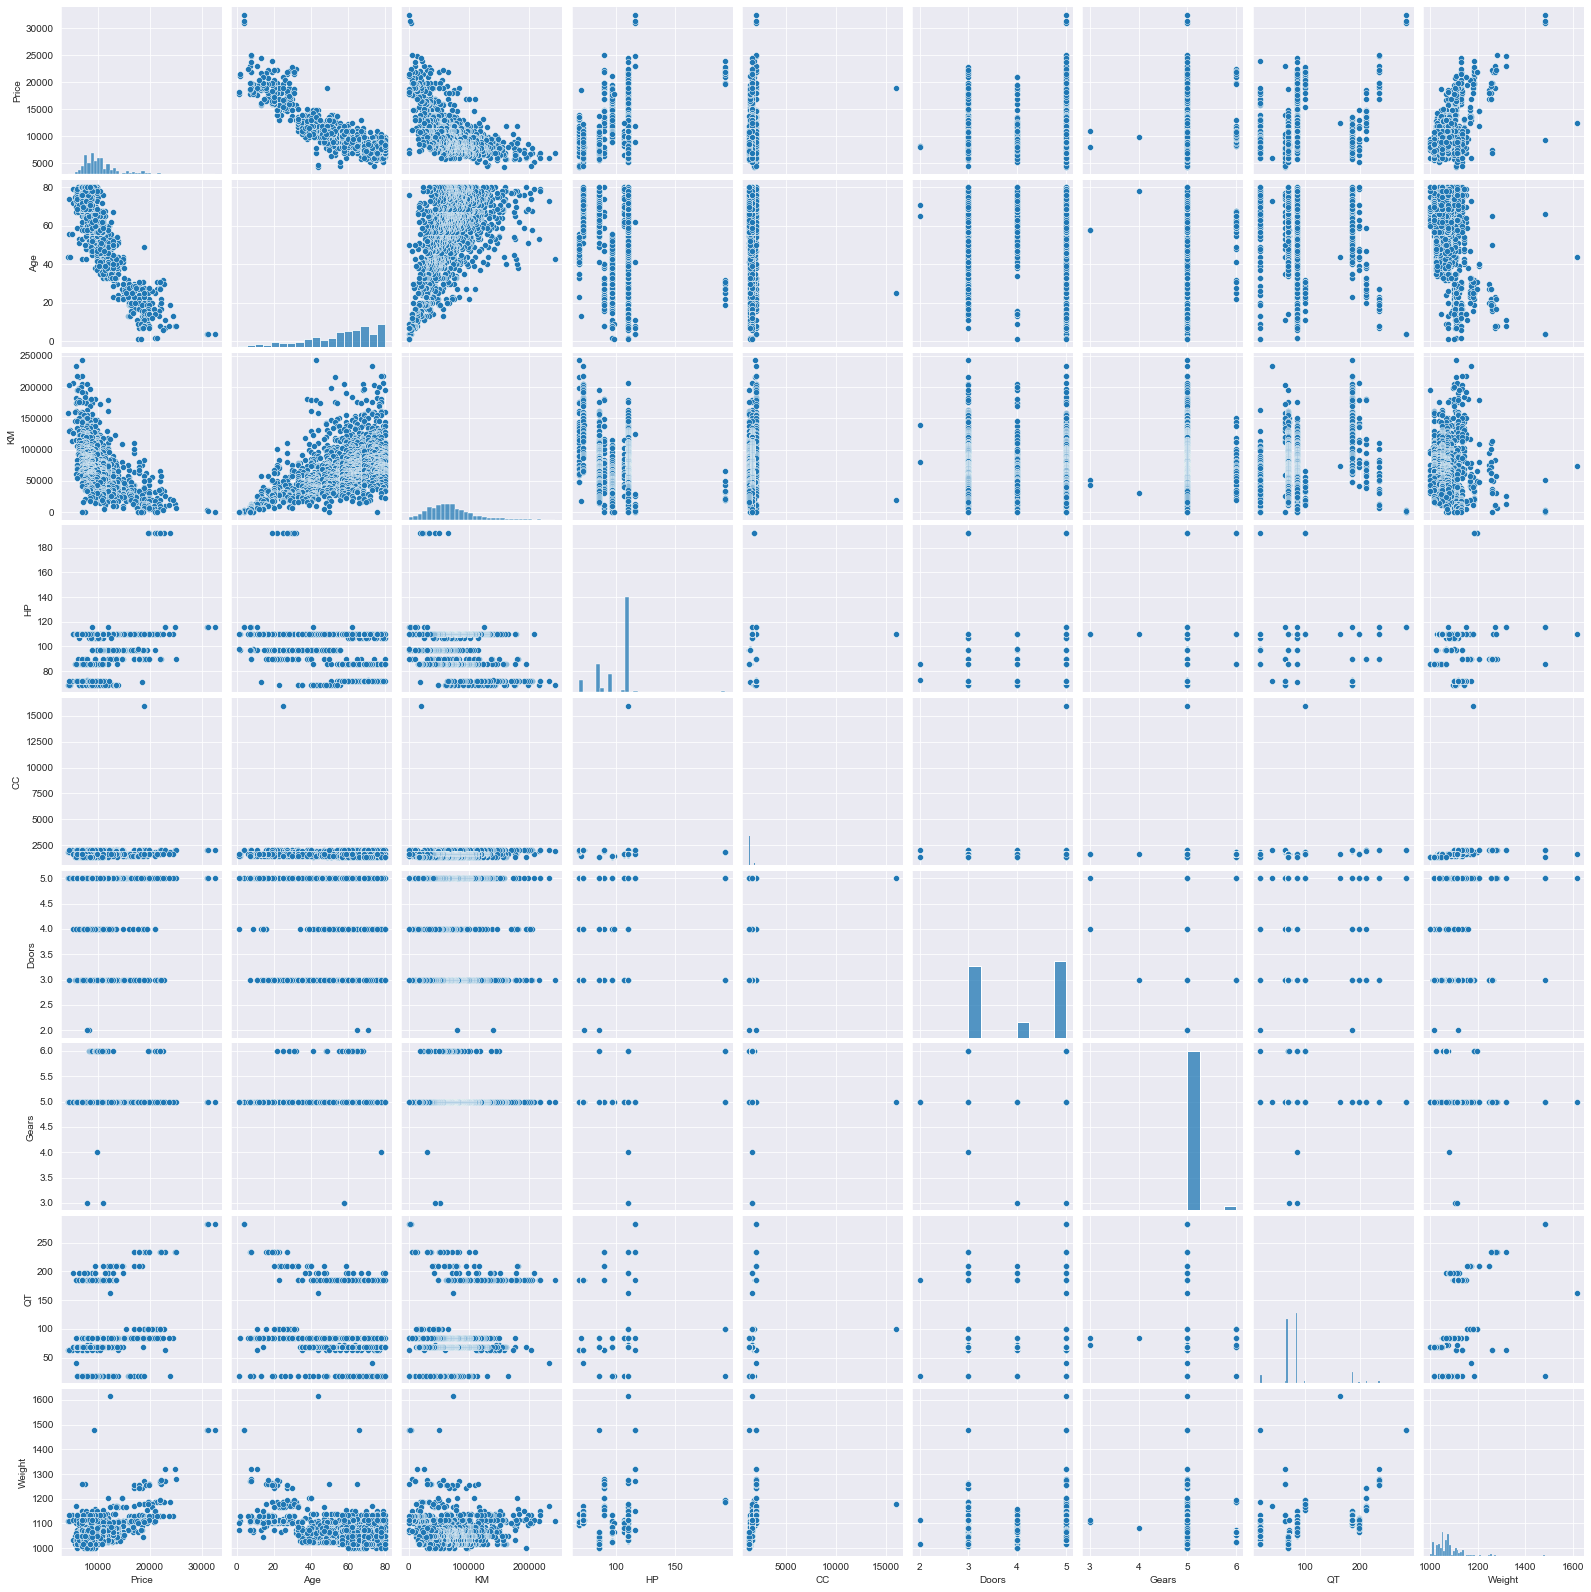

In [15]:
sns.set_style(style = 'darkgrid')
sns.pairplot(imp_data)
plt.show()

# 4. Model Building || 5. Model Training 

In [16]:
car_model = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = imp_data).fit()
print('R2Score     :',car_model.rsquared.round(4)) 
print('Adj.R2Score :',car_model.rsquared_adj.round(4))
print('AIC Value   :',car_model.aic.round(4)) 
print('BIC Value   :',car_model.bic.round(4)) 
print('P-Value     :\n',car_model.pvalues)
print('t-value     :\n',car_model.tvalues)

R2Score     : 0.8625
Adj.R2Score : 0.8617
AIC Value   : 24750.4072
BIC Value   : 24797.8275
P-Value     :
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64
t-value     :
 Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64


In [17]:
car_model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

## Model 1:

In [18]:
car_model_1 = smf.ols(formula = 'Price~Age', data = imp_data).fit()
print('R2Score     :',car_model_1.rsquared.round(4)) 
print('Adj.R2Score :',car_model_1.rsquared_adj.round(4))
print('AIC Value   :',car_model_1.aic.round(4)) 
print('BIC Value   :',car_model_1.bic.round(4)) 
print('P-Value     :\n',car_model_1.pvalues)
print('t-value     :\n',car_model_1.tvalues)

R2Score     : 0.7679
Adj.R2Score : 0.7677
AIC Value   : 25488.1804
BIC Value   : 25498.7182
P-Value     :
 Intercept    0.0
Age          0.0
dtype: float64
t-value     :
 Intercept    138.818198
Age          -68.846693
dtype: float64


In [19]:
car_model_1.params

Intercept    20257.120773
Age           -170.348732
dtype: float64

## Model 2:

In [20]:
car_model_2 = smf.ols(formula = 'Price~Age+KM', data = imp_data).fit()
print('R2Score     :',car_model_2.rsquared.round(4)) 
print('Adj.R2Score :',car_model_2.rsquared_adj.round(4))
print('AIC Value   :',car_model_2.aic.round(4)) 
print('BIC Value   :',car_model_2.bic.round(4)) 
print('P-Value     :\n',car_model_2.pvalues)
print('t-value     :\n',car_model_2.tvalues)

R2Score     : 0.7896
Adj.R2Score : 0.7893
AIC Value   : 25349.1378
BIC Value   : 25364.9445
P-Value     :
 Intercept    0.000000e+00
Age          0.000000e+00
KM           1.872211e-32
dtype: float64
t-value     :
 Intercept    146.207406
Age          -56.276050
KM           -12.161288
dtype: float64


In [21]:
car_model_2.params

Intercept    20446.529031
Age           -153.600326
KM              -0.016435
dtype: float64

## Model 3:

In [22]:
car_model_3 = smf.ols(formula = 'Price~Age+KM+HP', data = imp_data).fit()
print('R2Score     :',car_model_3.rsquared.round(4)) 
print('Adj.R2Score :',car_model_3.rsquared_adj.round(4))
print('AIC Value   :',car_model_3.aic.round(4)) 
print('BIC Value   :',car_model_3.bic.round(4)) 
print('P-Value     :\n',car_model_3.pvalues)
print('t-value     :\n',car_model_3.tvalues)

R2Score     : 0.81
Adj.R2Score : 0.8096
AIC Value   : 25204.9648
BIC Value   : 25226.0404
P-Value     :
 Intercept    1.163480e-291
Age           0.000000e+00
KM            4.247724e-17
HP            1.498414e-33
dtype: float64
t-value     :
 Intercept    46.907677
Age         -59.381611
KM           -8.512207
HP           12.387422
dtype: float64


In [23]:
car_model_3.params

Intercept    16431.852801
Age           -154.101081
KM              -0.011459
HP              36.470349
dtype: float64

## Model 4:

In [24]:
car_model_4 = smf.ols(formula = 'Price~Age+KM+HP+CC', data = imp_data).fit()
print('R2Score     :',car_model_4.rsquared.round(4)) 
print('Adj.R2Score :',car_model_4.rsquared_adj.round(4))
print('AIC Value   :',car_model_4.aic.round(4)) 
print('BIC Value   :',car_model_4.bic.round(4)) 
print('P-Value     :\n',car_model_4.pvalues)
print('t-value     :\n',car_model_4.tvalues)

R2Score     : 0.8131
Adj.R2Score : 0.8126
AIC Value   : 25182.9236
BIC Value   : 25209.2682
P-Value     :
 Intercept    2.138082e-251
Age           0.000000e+00
KM            2.817815e-20
HP            5.509435e-32
CC            9.892058e-07
dtype: float64
t-value     :
 Intercept    41.949661
Age         -58.074635
KM           -9.366347
HP           12.064122
CC            4.915200
dtype: float64


In [25]:
car_model_4.params

Intercept    15737.159456
Age           -151.850604
KM              -0.012746
HP              35.343015
CC               0.489289
dtype: float64

## Model 5:

In [26]:
car_model_5 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors', data = imp_data).fit()
print('R2Score     :',car_model_5.rsquared.round(4)) 
print('Adj.R2Score :',car_model_5.rsquared_adj.round(4))
print('AIC Value   :',car_model_5.aic.round(4)) 
print('BIC Value   :',car_model_5.bic.round(4)) 
print('P-Value     :\n',car_model_5.pvalues)
print('t-value     :\n',car_model_5.tvalues)

R2Score     : 0.8153
Adj.R2Score : 0.8147
AIC Value   : 25167.8983
BIC Value   : 25199.5119
P-Value     :
 Intercept    2.172473e-212
Age           0.000000e+00
KM            2.268570e-21
HP            1.865347e-30
CC            2.598106e-06
Doors         3.841464e-05
dtype: float64
t-value     :
 Intercept    37.199697
Age         -57.238964
KM           -9.645230
HP           11.741326
CC            4.719332
Doors         4.129776
dtype: float64


In [27]:
car_model_5.params

Intercept    15081.612166
Age           -150.325653
KM              -0.013075
HP              34.327501
CC               0.467820
Doors          180.932794
dtype: float64

## Model 6:

In [28]:
car_model_6 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears', data = imp_data).fit()
print('R2Score     :',car_model_6.rsquared.round(4)) 
print('Adj.R2Score :',car_model_6.rsquared_adj.round(4))
print('AIC Value   :',car_model_6.aic.round(4)) 
print('BIC Value   :',car_model_6.bic.round(4)) 
print('P-Value     :\n',car_model_6.pvalues)
print('t-value     :\n',car_model_6.tvalues)

R2Score     : 0.8169
Adj.R2Score : 0.8162
AIC Value   : 25157.2601
BIC Value   : 25194.1426
P-Value     :
 Intercept    4.035386e-21
Age          0.000000e+00
KM           8.682544e-23
HP           4.008117e-25
CC           2.482003e-06
Doors        2.292852e-06
Gears        3.915360e-04
dtype: float64
t-value     :
 Intercept     9.582220
Age         -57.237648
KM           -9.996473
HP           10.553446
CC            4.728783
Doors         4.745107
Gears         3.554167
dtype: float64


In [29]:
car_model_6.params

Intercept    11187.922843
Age           -149.883404
KM              -0.013567
HP              31.702701
CC               0.466862
Doors          210.873999
Gears          805.700276
dtype: float64

## Model 7:

In [30]:
car_model_7 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT', data = imp_data).fit()
print('R2Score     :',car_model_7.rsquared.round(4)) 
print('Adj.R2Score :',car_model_7.rsquared_adj.round(4))
print('AIC Value   :',car_model_7.aic.round(4)) 
print('BIC Value   :',car_model_7.bic.round(4)) 
print('P-Value     :\n',car_model_7.pvalues)
print('t-value     :\n',car_model_7.tvalues)

R2Score     : 0.8386
Adj.R2Score : 0.8378
AIC Value   : 24978.8405
BIC Value   : 25020.9918
P-Value     :
 Intercept    3.508211e-19
Age          0.000000e+00
KM           9.698798e-46
HP           1.062529e-45
CC           2.600082e-01
Doors        1.790839e-04
Gears        3.428430e-03
QT           6.714076e-41
dtype: float64
t-value     :
 Intercept     9.080227
Age         -51.483443
KM          -14.715002
HP           14.707893
CC            1.126820
Doors         3.756724
Gears         2.931372
QT           13.826801
dtype: float64


In [31]:
car_model_7.params

Intercept    9990.346944
Age          -136.329989
KM             -0.019954
HP             43.299681
CC              0.108511
Doors         157.501801
Gears         625.417056
QT             15.929782
dtype: float64

## Model 8:

In [32]:
car_model_8 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = imp_data).fit()
print('R2Score     :',car_model_8.rsquared.round(4)) 
print('Adj.R2Score :',car_model_8.rsquared_adj.round(4))
print('AIC Value   :',car_model_8.aic.round(4)) 
print('BIC Value   :',car_model_8.bic.round(4)) 
print('P-Value     :\n',car_model_8.pvalues)
print('t-value     :\n',car_model_8.tvalues)

R2Score     : 0.8625
Adj.R2Score : 0.8617
AIC Value   : 24750.4072
BIC Value   : 24797.8275
P-Value     :
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64
t-value     :
 Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64


In [33]:
car_model_8.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [34]:
car_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:54:49   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Comparing all Models the Model 8 has best Rsquared value i.e 0.863. Hence we can predict the model

# 

## Measuring Variance Inflation Factor (VIF) :

In [35]:
Rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_age = 1/(1-Rsq_age)

Rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_KM = 1/(1-Rsq_KM)

Rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_HP = 1/(1-Rsq_HP)
 
Rsq_CC = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_CC = 1/(1-Rsq_CC)

Rsq_DR = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_DR = 1/(1-Rsq_DR)

Rsq_GR = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data = imp_data).fit().rsquared
VIF_GR = 1/(1-Rsq_GR)

Rsq_QT = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data = imp_data).fit().rsquared
VIF_QT = 1/(1-Rsq_QT)

Rsq_WT = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data = imp_data).fit().rsquared
VIF_WT = 1/(1-Rsq_WT)

# Putting the values in Dataframe format
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'VIF':[VIF_age,VIF_KM,VIF_HP,VIF_CC,VIF_DR,VIF_GR,VIF_QT,VIF_WT]}
VIF_df = pd.DataFrame(d1)
VIF_df

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


# 6. Model Testing - Residual Analysis

## 6.1 Normality of Residuals (Q-Q plot):

In [36]:
import statsmodels.api as sm 

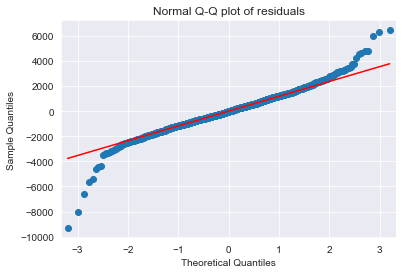

In [37]:
sm.qqplot(car_model.resid , line = 'q' )
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [38]:
list(np.where(car_model.resid > 6000))

[array([109, 146, 522], dtype=int64)]

## 6.2 Residual Plot for Homoscedasticity:

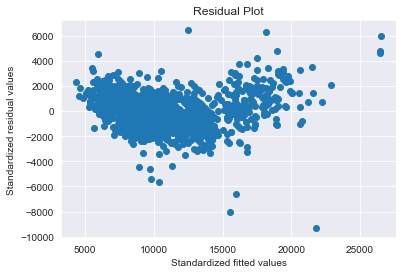

In [39]:
plt.scatter((car_model.fittedvalues),(car_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## 6.3 Residual Vs Regressors:

eval_env: 1


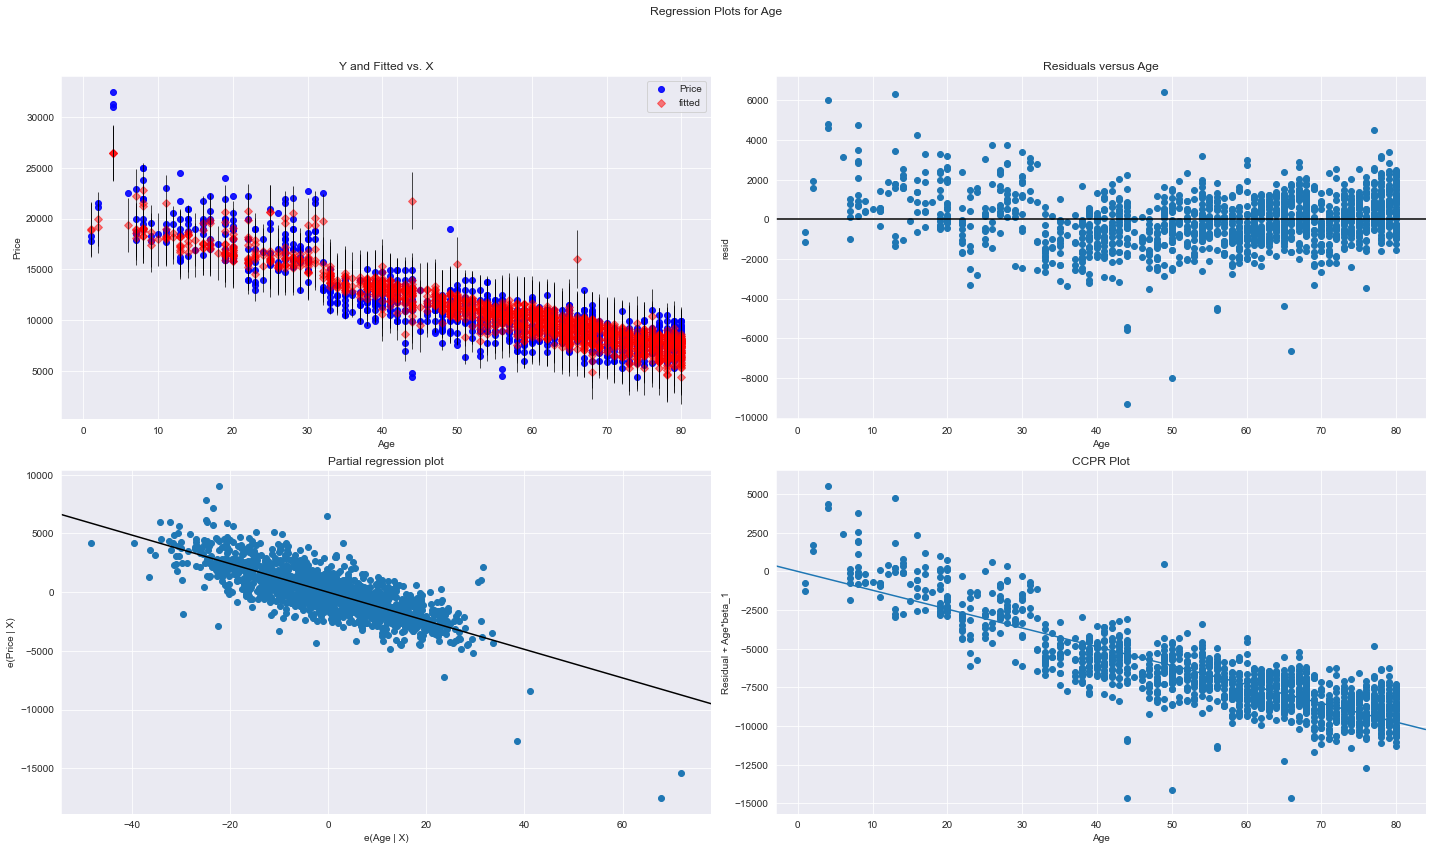

In [40]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(car_model,'Age',fig = figsize)
plt.show()

eval_env: 1


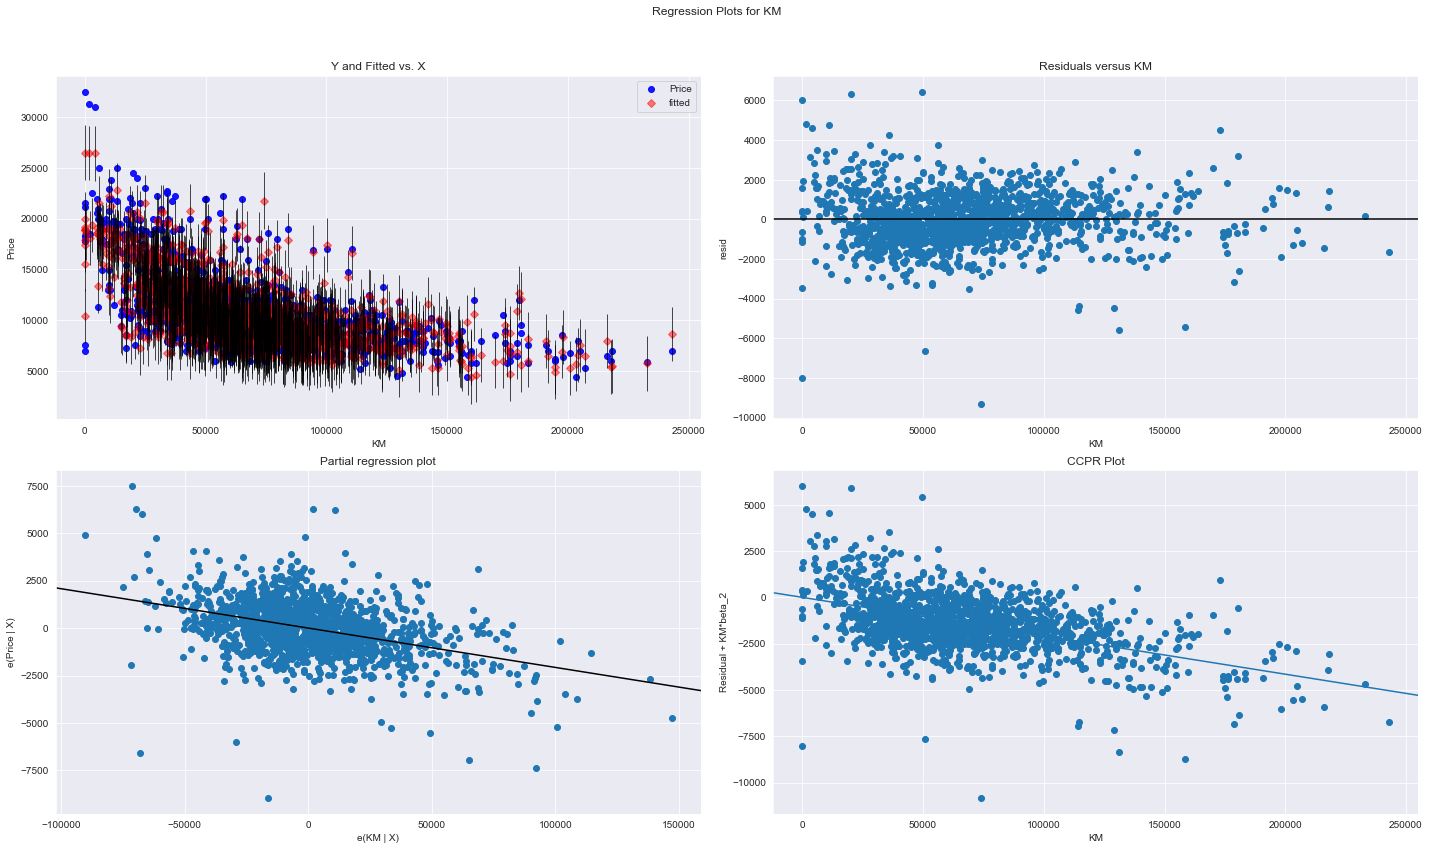

In [41]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(car_model,'KM',fig = figsize)
plt.show()

eval_env: 1


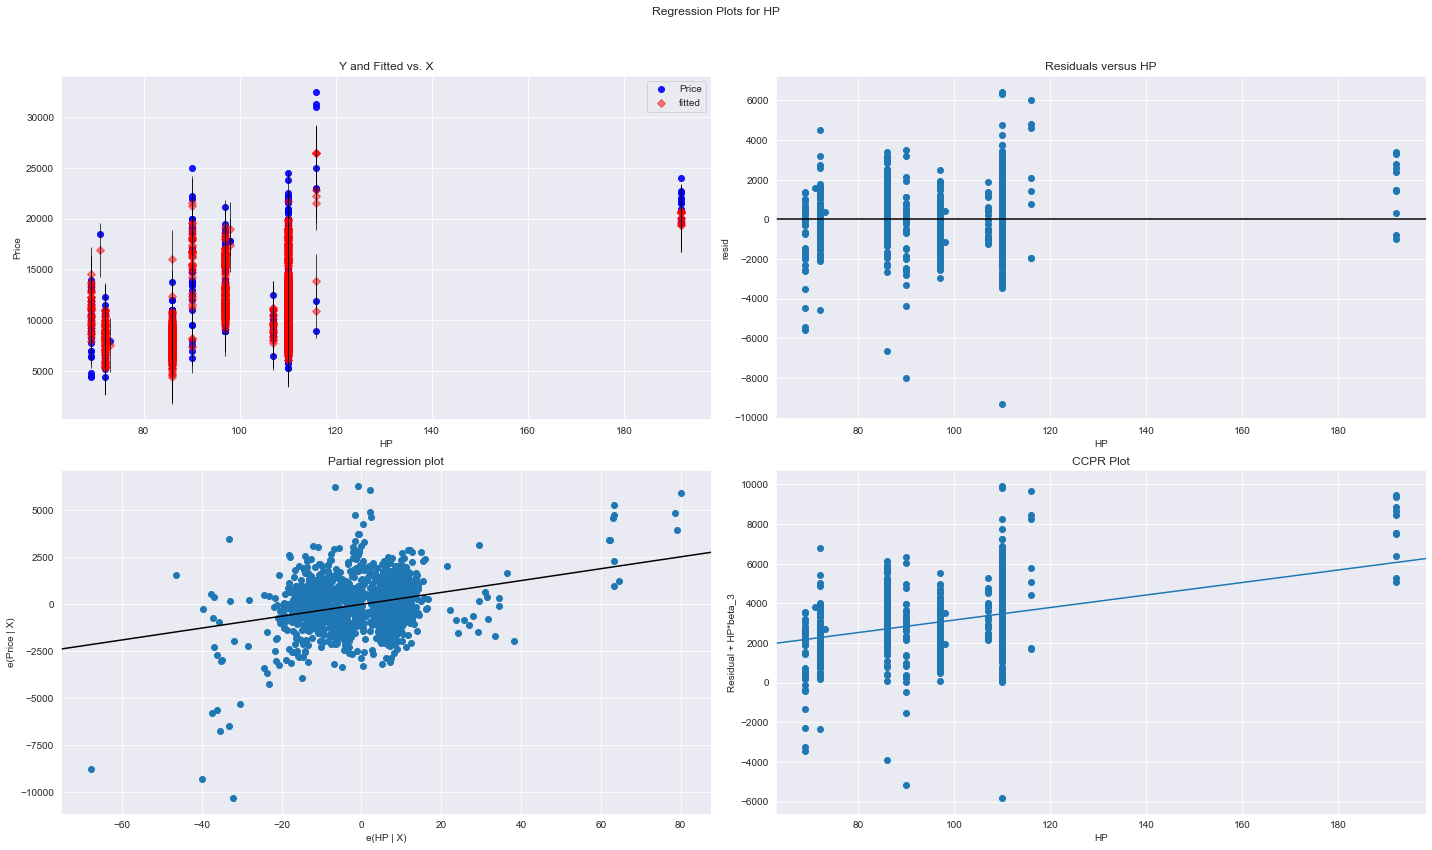

In [42]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(car_model,'HP',fig = figsize)
plt.show()

eval_env: 1


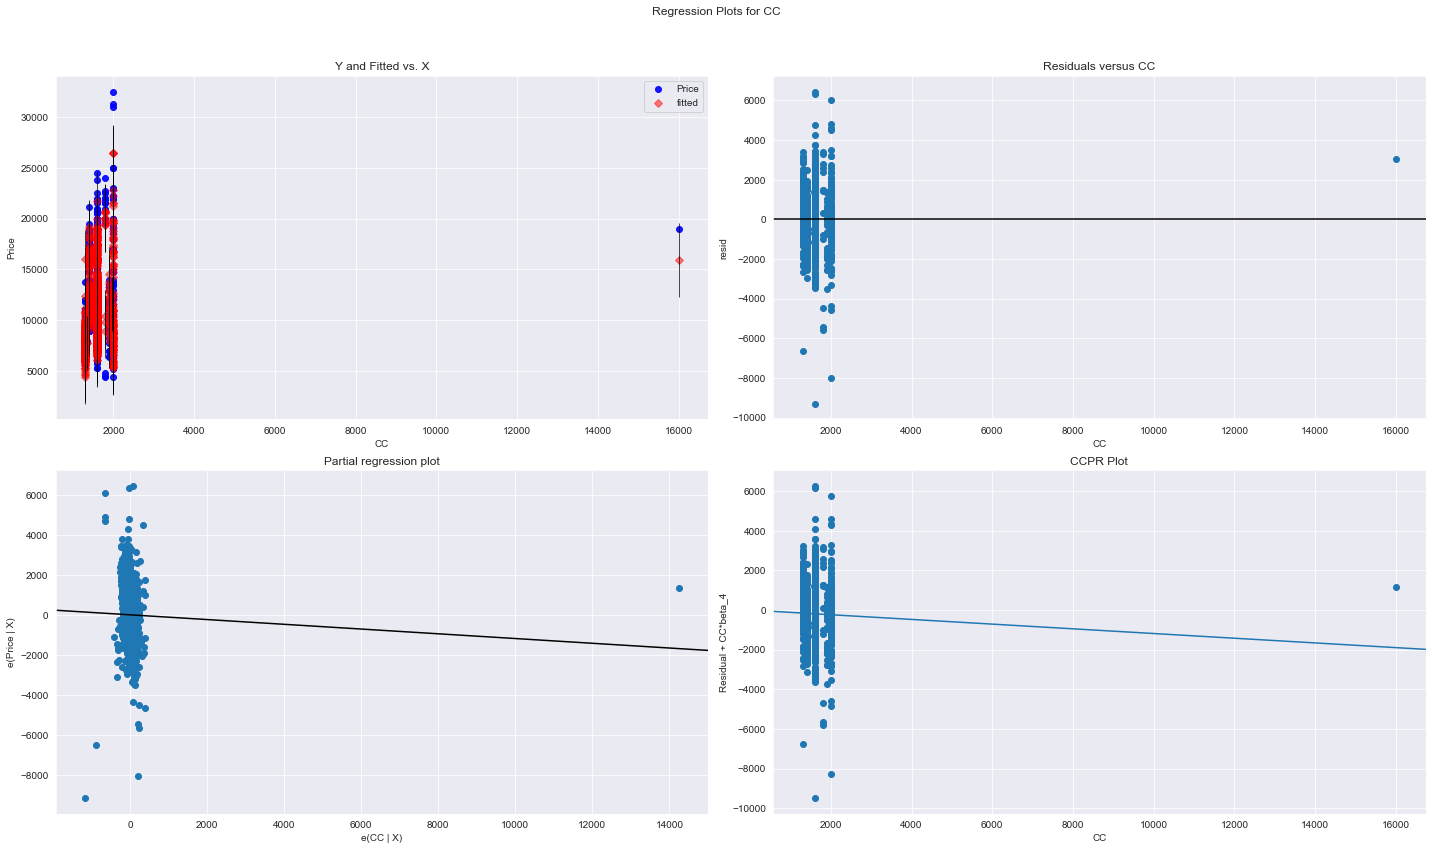

In [43]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(car_model,'CC',fig = figsize)
plt.show()

eval_env: 1


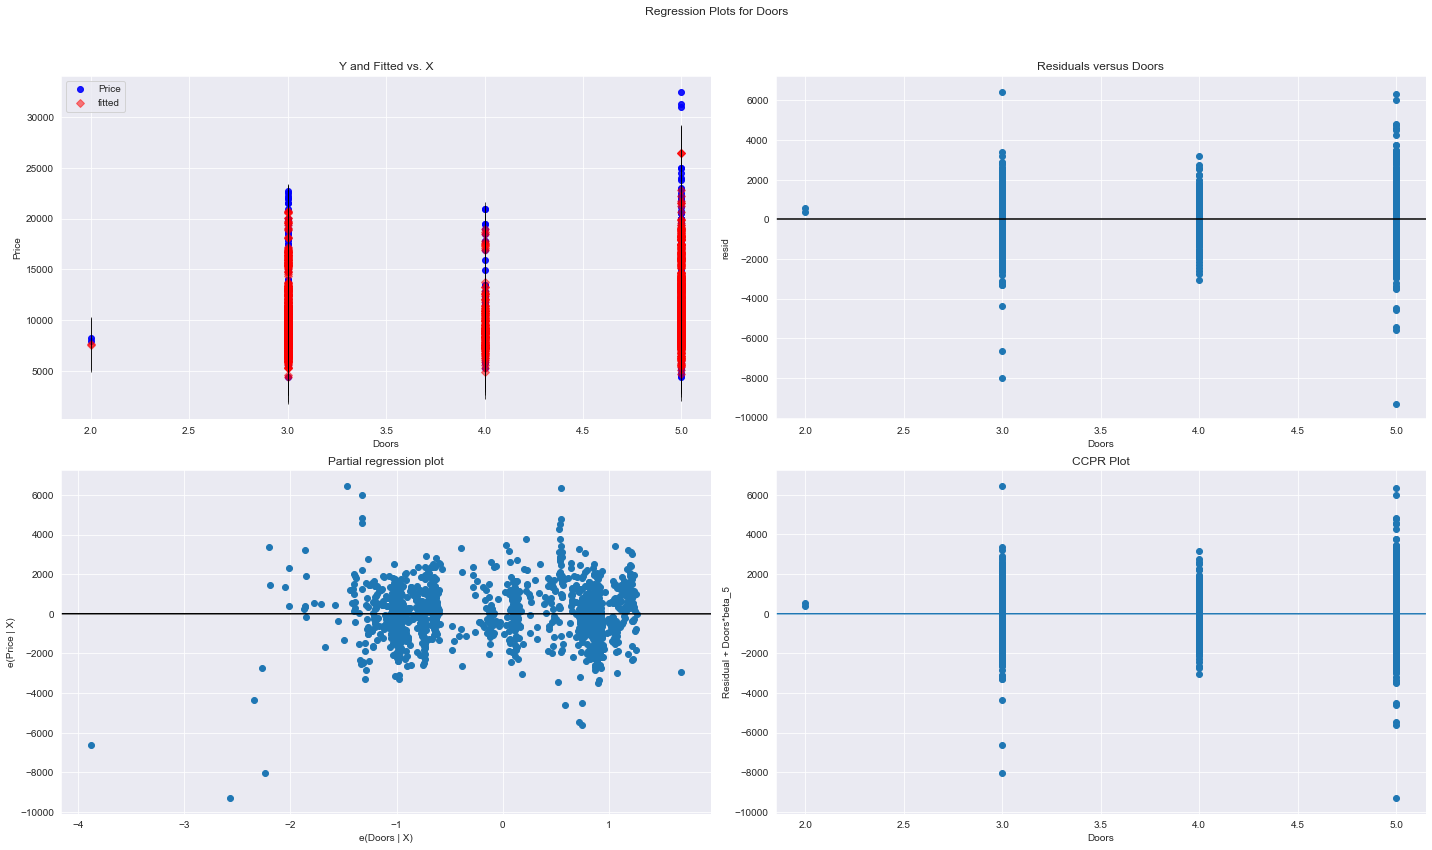

In [44]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(car_model,'Doors',fig = figsize)
plt.show()

eval_env: 1


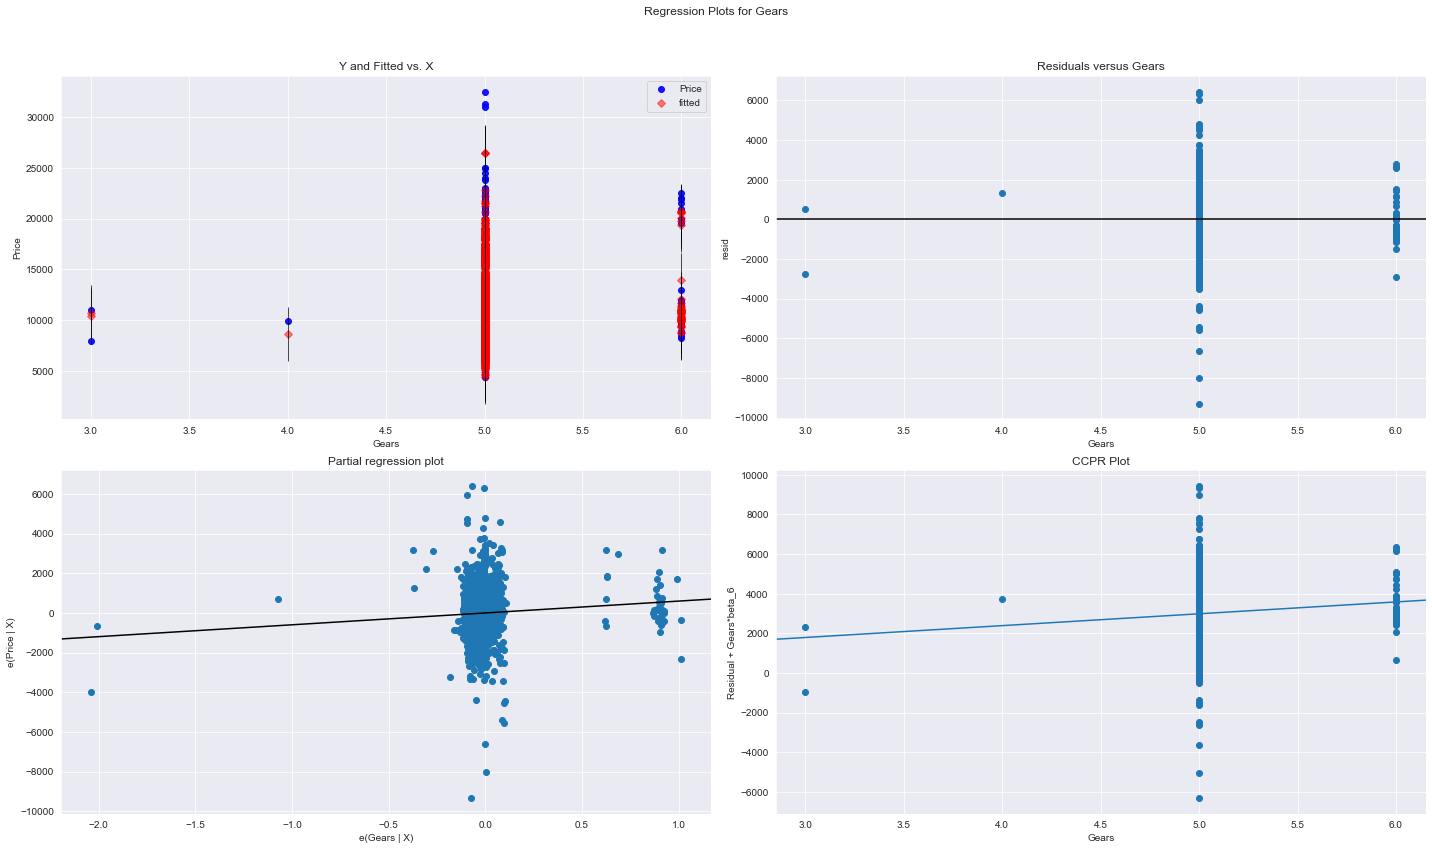

In [45]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(car_model,'Gears',fig = figsize)
plt.show()

eval_env: 1


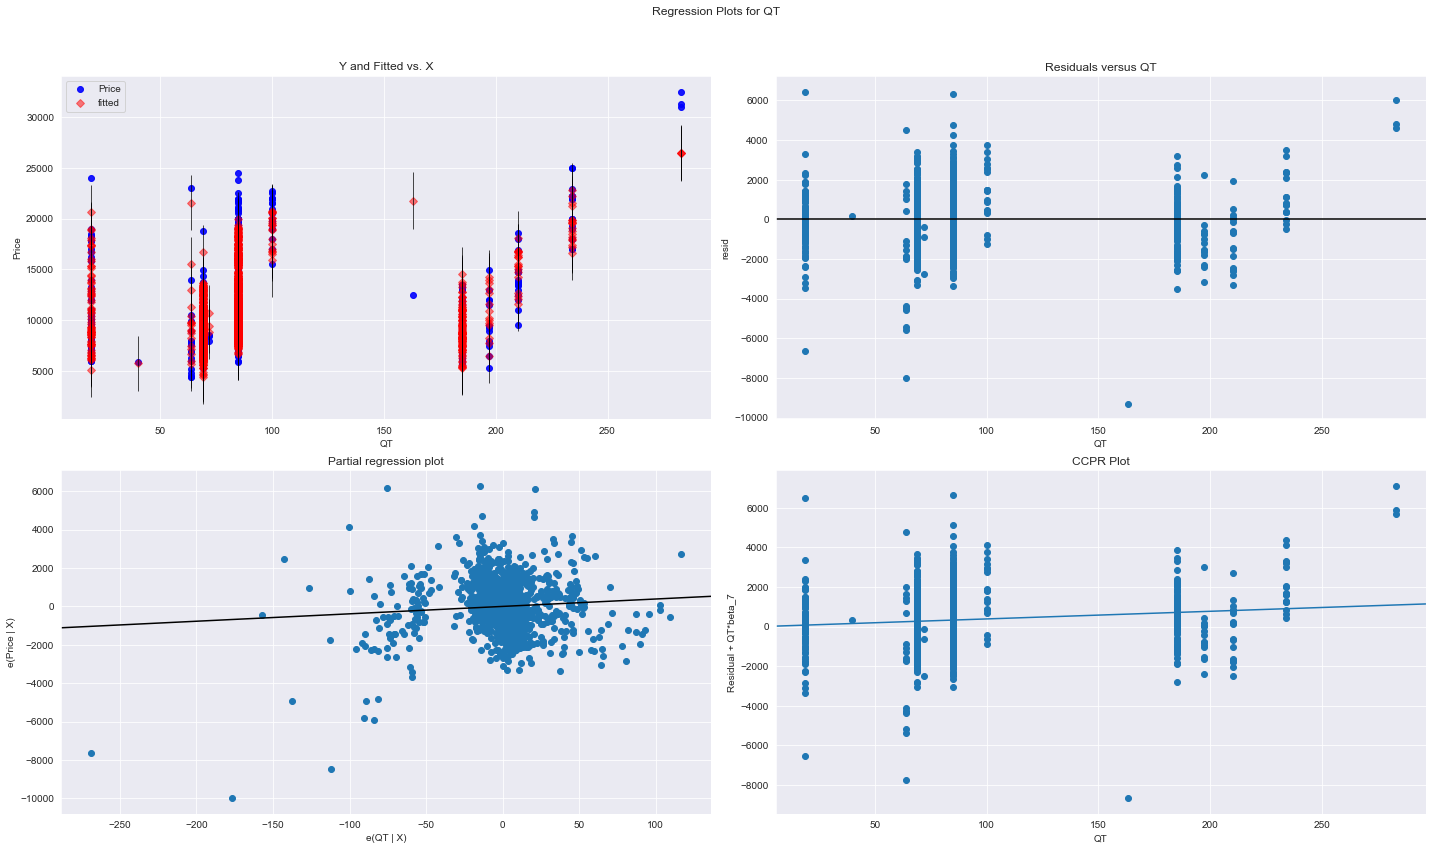

In [46]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(car_model,'QT',fig = figsize)
plt.show()

eval_env: 1


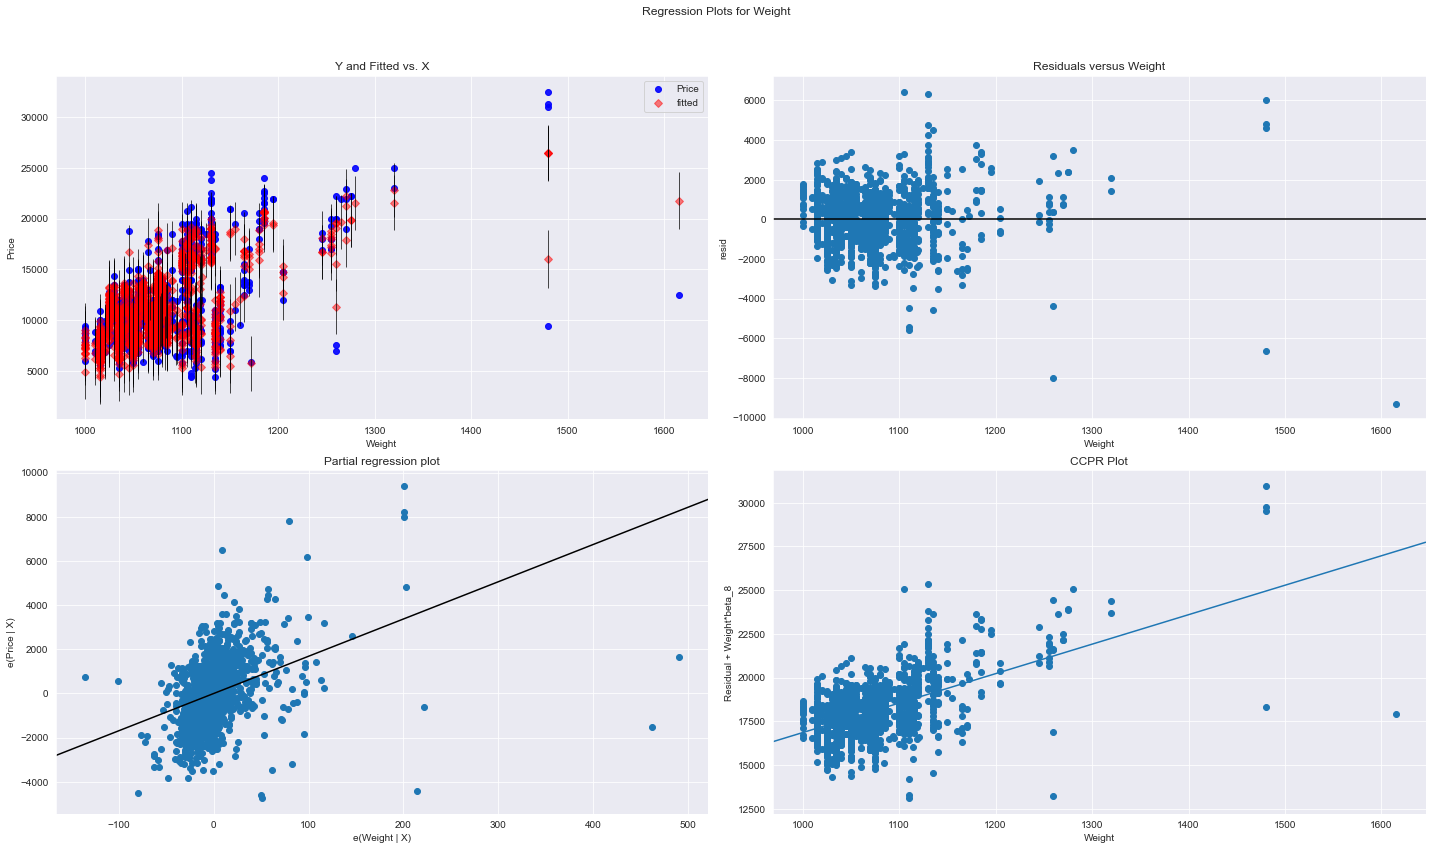

In [47]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(car_model,'Weight',fig = figsize)
plt.show()

## 6.4 Model Deletion Dignostics:
Detecting influencers/outliers

### Using Cook's Distance

In [48]:
car_model_influencers = car_model.get_influence()
(a,_) = car_model_influencers.cooks_distance
a

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

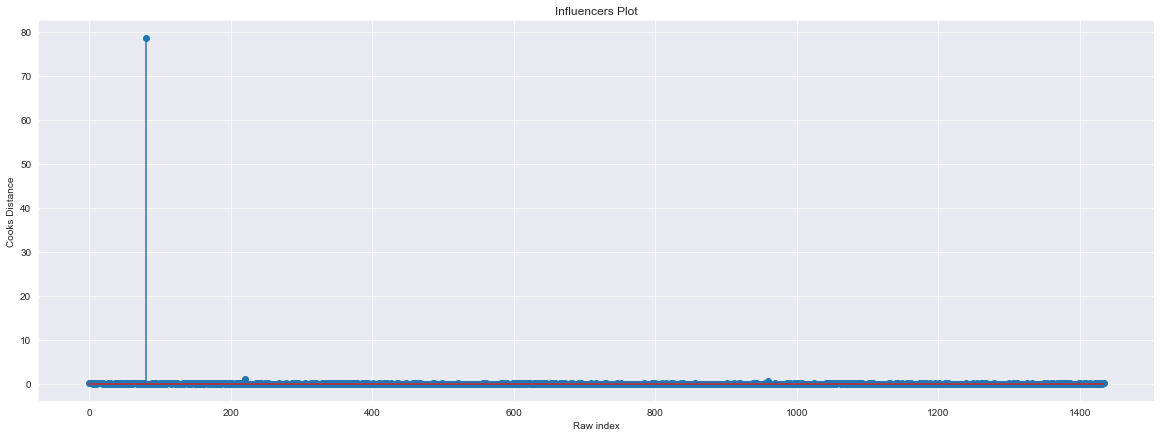

In [49]:
#Plot the influencers values using stem plot
plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(imp_data)),np.round(a,3))
plt.title('Influencers Plot')
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
#Index and values of influencer
(np.argmax(a), np.max(a))

(80, 78.72950582248232)

### High Influence Point

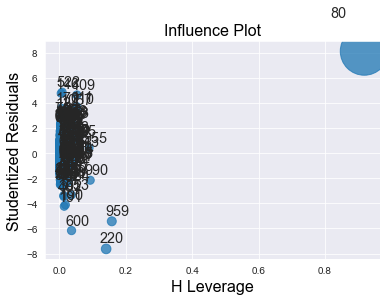

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(car_model)
plt.show()

In [52]:
k = imp_data.shape[1]
n = imp_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [53]:
leverage_cutoff

0.020905923344947737

# 

# 8. Checking if there is any improvement in the Rsquare and AIC Value if we drop a row

In [54]:
copy_1 = imp_data.copy()
copy_1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [55]:
imp_data_2 = copy_1.drop(copy_1.index[[80]],axis = 0).reset_index(drop = True)
imp_data_2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [56]:
imp_data_2.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [57]:
model1 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = imp_data_2).fit()
model1

In [58]:
model1.params

Intercept   -6197.933399
Age          -120.507430
KM             -0.017799
HP             39.224550
CC             -2.508791
Doors         -26.512930
Gears         527.129216
QT              8.941399
Weight         20.062713
dtype: float64

In [59]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:55:19   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model:

In [60]:
while car_model.rsquared < 0.90:
    for a in [np.max(a) > 0.5]:
        car_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = imp_data_2).fit()
        (a,_) = car_model.get_influence().cooks_distance
        a
        np.argmax(a) , np.max(a)
        imp_data_2  =imp_data_2.drop(imp_data_2.index[[np.argmax(a)]],axis = 0).reset_index(drop = True)
        imp_data_2
    else:
        final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = imp_data_2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [61]:
final_model.params

Intercept   -18635.955416
Age           -108.257335
KM              -0.015465
HP               7.853334
CC              -2.273119
Doors         -149.187276
Gears          251.436316
QT             -11.618726
Weight          36.976781
dtype: float64

In [62]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:55:24   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP             7.8533      3.037      2.586      0.010       1.895      13.812
CC            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears        251.4363    163.559      1.537      0.124     -69.428     572.301
QT           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 

# 9. Predicting For New Data:

In [63]:
newdata = pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index = [0])
newdata

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [64]:
final_model.predict(newdata)

0    14398.815471
dtype: float64

# Result : The final Prediction Price for the final Model we got the best price is 14398.81

## From the Final Model we get to know that after deleting a row we have been updated a new high Rsquare value i.e 0.900

## Hence Final Model is Better Model To predict for best price of TOYOTO_Corolla data.